# Data Preparation Pipeline
* Data Exploration
* Feature Engineering
* Data Cleaning
* Encoding & Scaling
* Saving Data

In [ ]:
# Basic Libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data Source

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/gee_test.csv")
column_names = df.columns.tolist()
print(column_names)

df = df.drop(['SCAN','TRACK','BRIGHTNESS'], axis = 1)
df.head()

['Unnamed: 0', 'LATITUDE', 'LONGITUDE', 'lat_min', 'lat_max', 'long_min', 'long_max', 'ACQ_DATE', 'ACQ_TIME', 'open_time', 'close_time', 'BRIGHTNESS', 'SCAN', 'TRACK', 'FireOccurred', 'CO_mol/m2', 'SO2_mol/m2', 'NO2_mol/m2', 'O3_mol/m2', 'location', 'INSTRUMENT', 'DAYNIGHT']


,Unnamed: 0,LATITUDE,LONGITUDE,lat_min,lat_max,long_min,long_max,ACQ_DATE,ACQ_TIME,open_time,close_time,FireOccurred,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,location,INSTRUMENT,DAYNIGHT
0,0,6.8704,100.4631,6.837,7.133,100.244,100.574,01/25/2019,07:00:00,06:00:00,08:00:00,0,0.050393,-0.000069,0.000048,0.112543,132,0,0
1,1,6.8704,100.4631,6.837,7.133,100.244,100.574,01/25/2019,07:00:00,06:00:00,08:00:00,0,0.052195,-0.000069,0.000048,0.112543,132,0,0
2,2,6.8704,100.4631,6.837,7.133,100.244,100.574,01/25/2019,07:00:00,06:00:00,08:00:00,0,0.050393,-0.000069,0.000044,0.112543,132,0,0
3,3,6.8704,100.4631,6.837,7.133,100.244,100.574,01/25/2019,07:00:00,06:00:00,08:00:00,0,0.052195,-0.000069,0.000044,0.112543,132,0,0
4,4,6.9289,100.4219,6.837,7.133,100.244,100.574,02/24/2019,07:00:00,07:00:00,09:00:00,0,0.038055,0.000106,0.000046,0.118280,132,0,0


## Data Exploration & Feature Engineering

### Missing Values

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171893 entries, 0 to 171892
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    171893 non-null  int64  
 1   LATITUDE      171893 non-null  float64
 2   LONGITUDE     171893 non-null  float64
 3   lat_min       171893 non-null  float64
 4   lat_max       171893 non-null  float64
 5   long_min      171893 non-null  float64
 6   long_max      171893 non-null  float64
 7   ACQ_DATE      171893 non-null  object 
 8   ACQ_TIME      171893 non-null  object 
 9   open_time     171893 non-null  object 
 10  close_time    171893 non-null  object 
 11  FireOccurred  171893 non-null  int64  
 12  CO_mol/m2     171893 non-null  float64
 13  SO2_mol/m2    171893 non-null  float64
 14  NO2_mol/m2    171893 non-null  float64
 15  O3_mol/m2     171893 non-null  float64
 16  location      171893 non-null  int64  
 17  INSTRUMENT    171893 non-null  int64  
 18  DAYN

### Feature Selection

In [ ]:
print("Column numbers: ", len(df.columns))

Column numbers:  19


In [ ]:
df.dtypes

Unnamed: 0        int64
LATITUDE        float64
LONGITUDE       float64
lat_min         float64
lat_max         float64
long_min        float64
long_max        float64
ACQ_DATE         object
ACQ_TIME         object
open_time        object
close_time       object
FireOccurred      int64
CO_mol/m2       float64
SO2_mol/m2      float64
NO2_mol/m2      float64
O3_mol/m2       float64
location          int64
INSTRUMENT        int64
DAYNIGHT          int64
dtype: object

In [ ]:
display(df['ACQ_DATE'].value_counts())
display(df['ACQ_TIME'].value_counts())
display(df['open_time'].value_counts())
display(df['close_time'].value_counts())

04/02/2020    3542
03/11/2020    3519
03/14/2020    3269
03/29/2020    3010
01/28/2020    2856
              ... 
02/09/2021       1
06/06/2022       1
09/05/2021       1
06/16/2019       1
10/02/2022       1
Name: ACQ_DATE, Length: 927, dtype: int64

07:00:00    113220
06:00:00     56155
08:00:00      2423
05:00:00        95
Name: ACQ_TIME, dtype: int64

06:00:00    103703
05:00:00     58551
07:00:00      9639
Name: open_time, dtype: int64

07:00:00    92191
08:00:00    66777
09:00:00     9146
12:00:00     3565
13:00:00      213
11:00:00        1
Name: close_time, dtype: int64

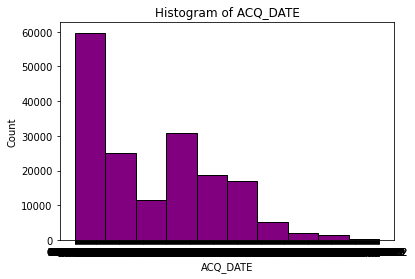

In [ ]:
df['ACQ_DATE'].hist(color='purple', edgecolor='black')
plt.xlabel('ACQ_DATE')
plt.ylabel("Count")
plt.title(f"Histogram of {'ACQ_DATE'}")
plt.grid(False)
plt.show()

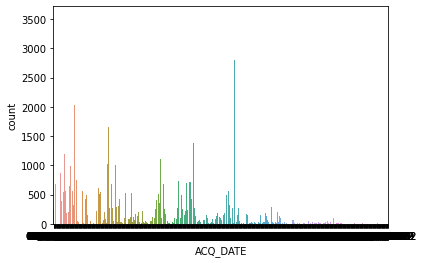

In [ ]:
sb.countplot(x=df["ACQ_DATE"])

ACQ_DATE will be changed to seasonality instead

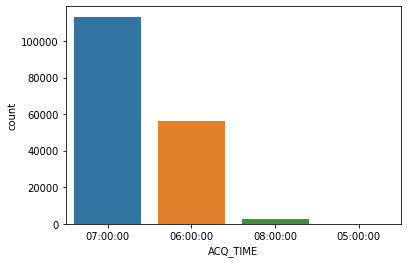

In [ ]:
sb.countplot(x=df["ACQ_TIME"])

ACQ_TIME is not as evenly distributed as expected.

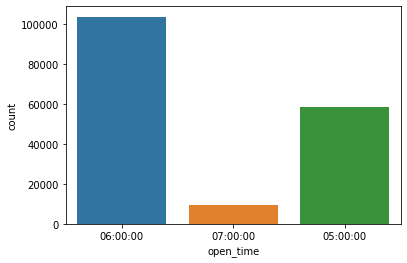

In [ ]:
sb.countplot(x=df["open_time"])

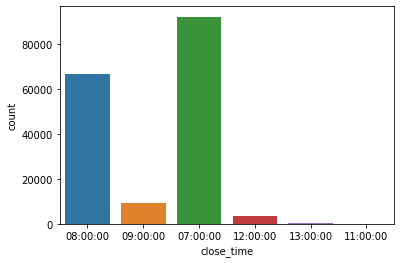

In [ ]:
sb.countplot(x=df["close_time"])

In [ ]:
df = df.drop(['open_time','close_time'], axis=1) # Not available in sensor device

0 = MODIS 1 = VIIRS

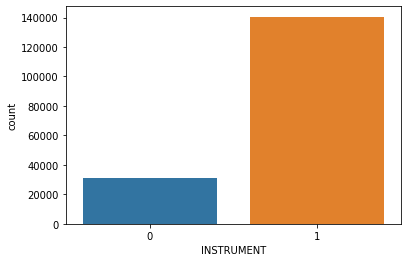

In [ ]:
sb.countplot(x=df["INSTRUMENT"])

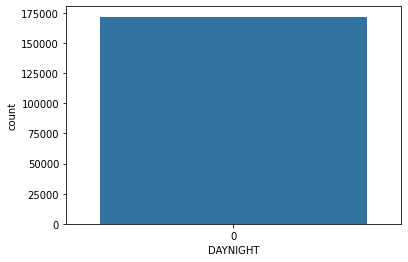

In [ ]:
sb.countplot(x=df["DAYNIGHT"])

DAYNIGHT should be dropped. Redundant feature.

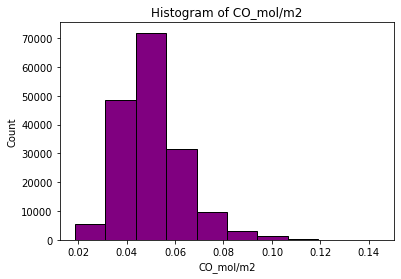

In [ ]:
df['CO_mol/m2'].hist(color='purple', edgecolor='black')
plt.xlabel('CO_mol/m2')
plt.ylabel("Count")
plt.title(f"Histogram of {'CO_mol/m2'}")
plt.grid(False)
plt.show()

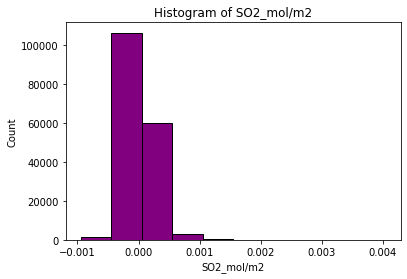

In [ ]:
df['SO2_mol/m2'].hist(color='purple', edgecolor='black')
plt.xlabel('SO2_mol/m2')
plt.ylabel("Count")
plt.title(f"Histogram of {'SO2_mol/m2'}")
plt.grid(False)
plt.show()

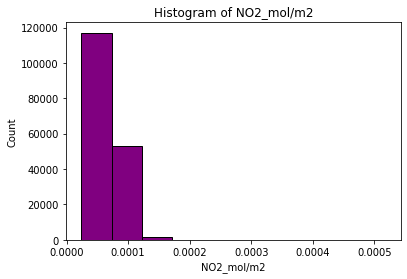

In [ ]:
df['NO2_mol/m2'].hist(color='purple', edgecolor='black')
plt.xlabel('NO2_mol/m2')
plt.ylabel("Count")
plt.title(f"Histogram of {'NO2_mol/m2'}")
plt.grid(False)
plt.show()

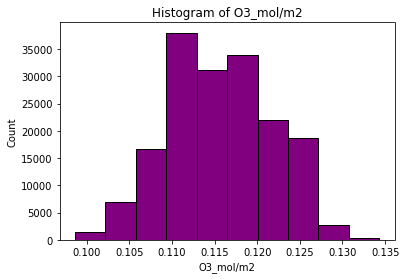

In [ ]:
df['O3_mol/m2'].hist(color='purple', edgecolor='black')
plt.xlabel('O3_mol/m2')
plt.ylabel("Count")
plt.title(f"Histogram of {'O3_mol/m2'}")
plt.grid(False)
plt.show()

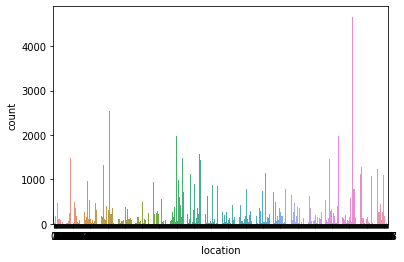

In [ ]:
sb.countplot(x=df["location"])

In [ ]:
df = df.drop(['Unnamed: 0','DAYNIGHT','lat_min','lat_max','long_min','long_max'], axis = 1)
df.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,FireOccurred,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,location,INSTRUMENT
0,6.8704,100.4631,01/25/2019,07:00:00,0,0.050393,-0.000069,0.000048,0.112543,132,0
1,6.8704,100.4631,01/25/2019,07:00:00,0,0.052195,-0.000069,0.000048,0.112543,132,0
2,6.8704,100.4631,01/25/2019,07:00:00,0,0.050393,-0.000069,0.000044,0.112543,132,0
3,6.8704,100.4631,01/25/2019,07:00:00,0,0.052195,-0.000069,0.000044,0.112543,132,0
4,6.9289,100.4219,02/24/2019,07:00:00,0,0.038055,0.000106,0.000046,0.118280,132,0


lat_min, lat_max, long_min, long_max is redundant with LATITUDE and LONGTITUDE

In [ ]:
print("Column numbers: ", len(df.columns))

Column numbers:  11


In [ ]:
df.dtypes

LATITUDE        float64
LONGITUDE       float64
ACQ_DATE         object
ACQ_TIME         object
FireOccurred      int64
CO_mol/m2       float64
SO2_mol/m2      float64
NO2_mol/m2      float64
O3_mol/m2       float64
location          int64
INSTRUMENT        int64
dtype: object

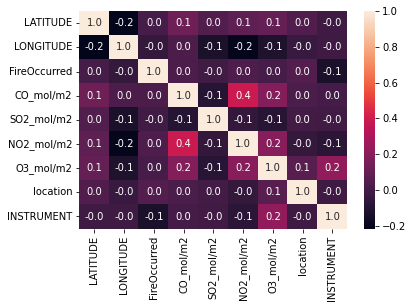

In [ ]:
corrplot = sb.heatmap(df.corr(), annot=True, fmt=".1f")

Heatmap here does not check for autocorrelation of object type features yet. Will check again after encoding features.

### Seasonality

In [ ]:
sorted_df = df.copy()
sorted_df['ACQ_DATE'] = pd.to_datetime(df['ACQ_DATE'])
sorted_df = sorted_df.sort_values(by='ACQ_DATE')
sorted_df.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,FireOccurred,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,location,INSTRUMENT
91520,15.8938,101.0964,2018-11-22,07:00:00,0,0.034054,0.000144,0.000056,0.109993,70,0
110504,14.8880,100.1469,2018-11-22,07:00:00,0,0.035644,-0.000048,0.000063,0.111233,118,0
110503,13.9029,101.0592,2018-11-22,07:00:00,0,0.035132,0.000080,0.000073,0.110186,47,0
61613,15.3056,104.0359,2018-11-22,07:00:00,0,0.033149,-0.000021,0.000059,0.109272,506,0
91519,15.8924,101.0866,2018-11-22,07:00:00,0,0.034054,0.000144,0.000056,0.109993,70,0


In [ ]:
sorted_df.tail()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,FireOccurred,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,location,INSTRUMENT
116746,17.13707,100.13142,2022-12-14,06:00:00,0,0.042066,0.000015,0.000068,0.104851,480,1
116745,17.13396,100.12930,2022-12-14,06:00:00,0,0.042066,0.000015,0.000068,0.104851,480,1
116744,17.16199,100.12304,2022-12-14,06:00:00,0,0.042066,0.000015,0.000068,0.104851,480,1
89648,16.46241,102.25539,2022-12-14,06:00:00,0,0.036872,0.000296,0.000072,0.104388,481,1
75827,17.48568,100.05637,2022-12-14,06:00:00,0,0.041050,-0.000059,0.000074,0.103971,645,1


In [ ]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171893 entries, 91520 to 75827
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   LATITUDE      171893 non-null  float64       
 1   LONGITUDE     171893 non-null  float64       
 2   ACQ_DATE      171893 non-null  datetime64[ns]
 3   ACQ_TIME      171893 non-null  object        
 4   FireOccurred  171893 non-null  int64         
 5   CO_mol/m2     171893 non-null  float64       
 6   SO2_mol/m2    171893 non-null  float64       
 7   NO2_mol/m2    171893 non-null  float64       
 8   O3_mol/m2     171893 non-null  float64       
 9   location      171893 non-null  int64         
 10  INSTRUMENT    171893 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 15.7+ MB


In [ ]:
ts_data = sorted_df[['ACQ_DATE','FireOccurred']]
ts_data = ts_data.loc[ts_data['FireOccurred'] == 1].drop_duplicates().sort_values(by='ACQ_DATE')
ts_data.head()

,ACQ_DATE,FireOccurred
117870,2018-12-05,1
143221,2018-12-23,1
42025,2018-12-24,1
61638,2019-01-02,1
152409,2019-01-06,1


In [ ]:
ts_data.tail()

,ACQ_DATE,FireOccurred
141800,2022-03-20,1
21025,2022-03-28,1
142131,2022-03-30,1
142198,2022-04-02,1
102994,2022-04-28,1


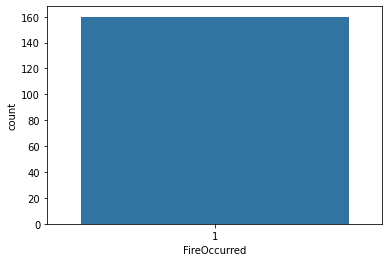

In [ ]:
sb.countplot(x=ts_data["FireOccurred"])

In [ ]:
ts_data = (ts_data.set_index('ACQ_DATE')
      .reindex(pd.date_range('2018-11-22', '2022-12-14', freq='D'))
      .rename_axis(['ACQ_DATE'])
      .fillna(0)
      .reset_index()).sort_values(by='ACQ_DATE')
ts_data.head()

,ACQ_DATE,FireOccurred
0,2018-11-22,0.0
1,2018-11-23,0.0
2,2018-11-24,0.0
3,2018-11-25,0.0
4,2018-11-26,0.0


In [ ]:
ts_data.tail()

,ACQ_DATE,FireOccurred
1479,2022-12-10,0.0
1480,2022-12-11,0.0
1481,2022-12-12,0.0
1482,2022-12-13,0.0
1483,2022-12-14,0.0


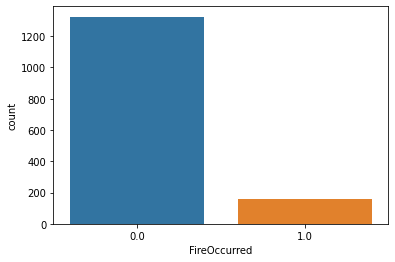

In [ ]:
sb.countplot(x=ts_data["FireOccurred"])

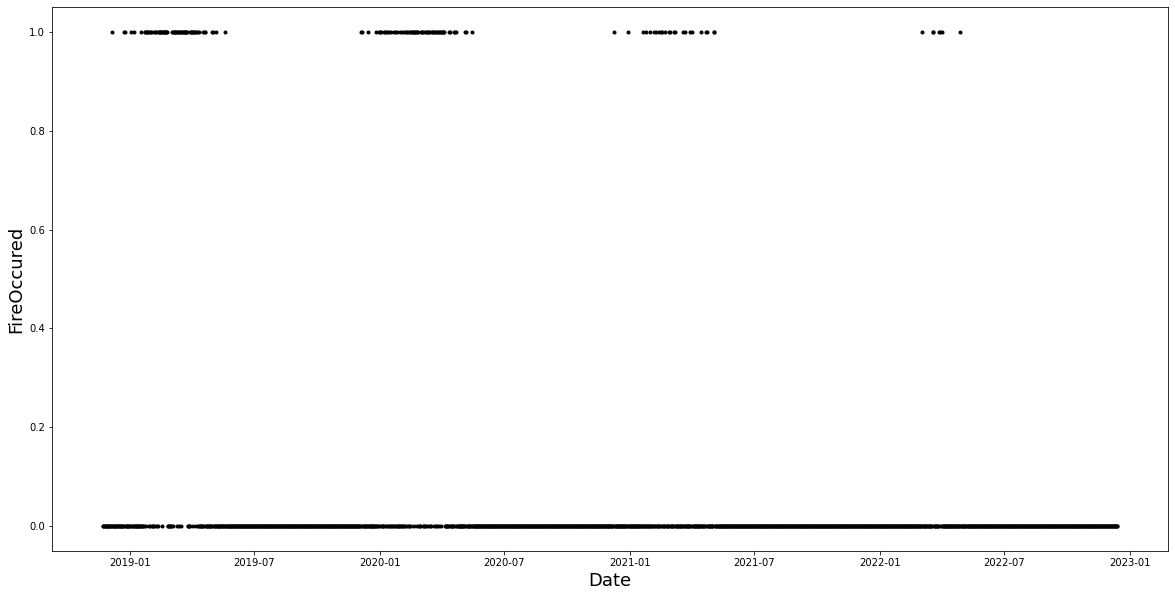

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(ts_data['ACQ_DATE'], ts_data['FireOccurred'], color = "black", linestyle="None", marker='.')
plt.ylabel("FireOccured", fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.show()

More forest fire occurs during the dry season from November to May

(Rainy season is from June to October)

In [ ]:
def mapfunc(row):
    if 6 <= row['ACQ_DATE'].month <= 10: # Rainy season
      var = 0
    else:
      var = 1
    return var

ts_data['DRY_SEASON'] = ts_data.apply(mapfunc, axis=1)

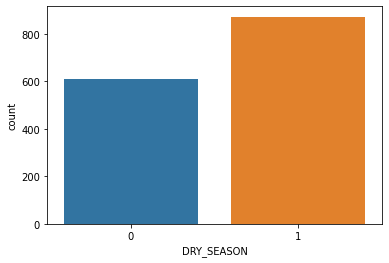

In [ ]:
sb.countplot(x=ts_data["DRY_SEASON"])

In [ ]:
ts_data.head()

,ACQ_DATE,FireOccurred,DRY_SEASON
0,2018-11-22,0.0,1
1,2018-11-23,0.0,1
2,2018-11-24,0.0,1
3,2018-11-25,0.0,1
4,2018-11-26,0.0,1


In [ ]:
ts_data.loc[(ts_data['FireOccurred'] == 1) & (ts_data['DRY_SEASON'] == 0)]

,ACQ_DATE,FireOccurred,DRY_SEASON


None.

Showing that the range of dry and rainy season as well as the implementation is correct.

In [ ]:
df['ACQ_DATE'] = pd.to_datetime(df['ACQ_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171893 entries, 0 to 171892
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   LATITUDE      171893 non-null  float64       
 1   LONGITUDE     171893 non-null  float64       
 2   ACQ_DATE      171893 non-null  datetime64[ns]
 3   ACQ_TIME      171893 non-null  object        
 4   FireOccurred  171893 non-null  int64         
 5   CO_mol/m2     171893 non-null  float64       
 6   SO2_mol/m2    171893 non-null  float64       
 7   NO2_mol/m2    171893 non-null  float64       
 8   O3_mol/m2     171893 non-null  float64       
 9   location      171893 non-null  int64         
 10  INSTRUMENT    171893 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 14.4+ MB


In [ ]:
dry = 0
rainy = 0

for i in range(len(df['ACQ_DATE'])):
  if 6 <= df['ACQ_DATE'][i].month <= 10:
    rainy +=1
  else:
    dry += 1

print(rainy)
print(dry)

4746
167147


Most measurements were taken during the dry season

In [ ]:
df = pd.merge(df, ts_data, on="ACQ_DATE", how="left")
df = df.drop(['FireOccurred_y'], axis = 1)
df.rename(columns = {'FireOccurred_x':'FIRE_OCCURRED',
                     'CO_mol/m2':'CO_MOL/M2',
                     'SO2_mol/m2':'SO2_MOL/M2',
                     'NO2_mol/m2':'NO2_MOL/M2',
                     'O3_mol/m2':'O3_MOL/M2',
                     'location':'LOCATION'
                     }, inplace = True)

print("Column numbers: ", len(df.columns))
df.head()

Column numbers:  12


,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON
0,6.8704,100.4631,2019-01-25,07:00:00,0,0.050393,-0.000069,0.000048,0.112543,132,0,1
1,6.8704,100.4631,2019-01-25,07:00:00,0,0.052195,-0.000069,0.000048,0.112543,132,0,1
2,6.8704,100.4631,2019-01-25,07:00:00,0,0.050393,-0.000069,0.000044,0.112543,132,0,1
3,6.8704,100.4631,2019-01-25,07:00:00,0,0.052195,-0.000069,0.000044,0.112543,132,0,1
4,6.9289,100.4219,2019-02-24,07:00:00,0,0.038055,0.000106,0.000046,0.118280,132,0,1


In [ ]:
df = df.drop('ACQ_DATE', axis=1)

## Encoder

Encode categorial data ( ACQ_TIME , OPEN_TIME , CLOSE_TIME ) using OneHotEncoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171893 entries, 0 to 171892
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LATITUDE       171893 non-null  float64
 1   LONGITUDE      171893 non-null  float64
 2   ACQ_TIME       171893 non-null  object 
 3   FIRE_OCCURRED  171893 non-null  int64  
 4   CO_MOL/M2      171893 non-null  float64
 5   SO2_MOL/M2     171893 non-null  float64
 6   NO2_MOL/M2     171893 non-null  float64
 7   O3_MOL/M2      171893 non-null  float64
 8   LOCATION       171893 non-null  int64  
 9   INSTRUMENT     171893 non-null  int64  
 10  DRY_SEASON     171893 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 15.7+ MB


In [ ]:
display(df['ACQ_TIME'].value_counts())

07:00:00    113220
06:00:00     56155
08:00:00      2423
05:00:00        95
Name: ACQ_TIME, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def onehot_top_k(df, column, threshold):
    values_count = df[column].value_counts()
    frequent_values = values_count[values_count >= threshold].index.tolist()
    df[column] = df[column].apply(lambda x: x if x in frequent_values else 'others')
    onehot = OneHotEncoder()
    onehot_values = onehot.fit_transform(df[[column]]).toarray()
    onehot_labels = [f"{column}_{val}" for val in onehot.categories_[0]]
    onehot_df = pd.DataFrame(onehot_values, columns=onehot_labels)
    df = pd.concat([df.reset_index(drop=True), onehot_df.reset_index(drop=True)], axis=1) # MUST RESET INDEX
    df = df.drop(column, axis=1)
    return df

df = onehot_top_k(df, 'ACQ_TIME', 50000)
df.head()

,LATITUDE,LONGITUDE,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON,ACQ_TIME_06:00:00,ACQ_TIME_07:00:00,ACQ_TIME_others
0,6.8704,100.4631,0,0.050393,-0.000069,0.000048,0.112543,132,0,1,0.0,1.0,0.0
1,6.8704,100.4631,0,0.052195,-0.000069,0.000048,0.112543,132,0,1,0.0,1.0,0.0
2,6.8704,100.4631,0,0.050393,-0.000069,0.000044,0.112543,132,0,1,0.0,1.0,0.0
3,6.8704,100.4631,0,0.052195,-0.000069,0.000044,0.112543,132,0,1,0.0,1.0,0.0
4,6.9289,100.4219,0,0.038055,0.000106,0.000046,0.118280,132,0,1,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171893 entries, 0 to 171892
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LATITUDE           171893 non-null  float64
 1   LONGITUDE          171893 non-null  float64
 2   FIRE_OCCURRED      171893 non-null  int64  
 3   CO_MOL/M2          171893 non-null  float64
 4   SO2_MOL/M2         171893 non-null  float64
 5   NO2_MOL/M2         171893 non-null  float64
 6   O3_MOL/M2          171893 non-null  float64
 7   LOCATION           171893 non-null  int64  
 8   INSTRUMENT         171893 non-null  int64  
 9   DRY_SEASON         171893 non-null  int64  
 10  ACQ_TIME_06:00:00  171893 non-null  float64
 11  ACQ_TIME_07:00:00  171893 non-null  float64
 12  ACQ_TIME_others    171893 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 17.0 MB


## Autocorrelation of Features

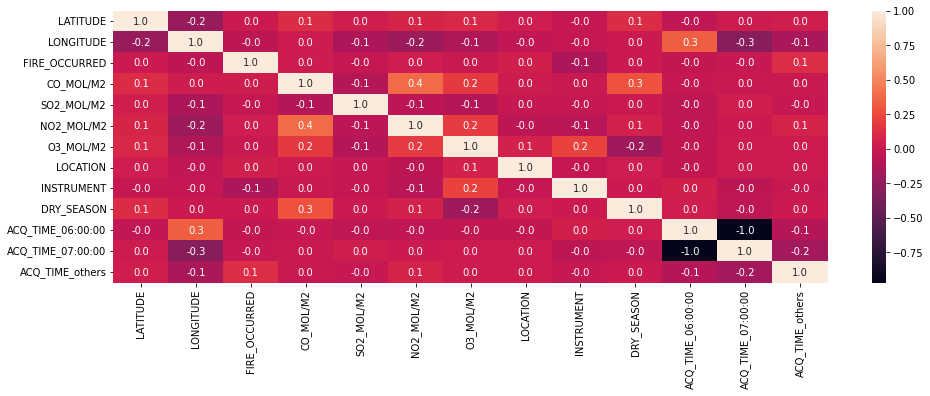

In [ ]:
plt.figure(figsize = (16,5))
dataplot = sb.heatmap(df.corr(), annot=True, fmt=".1f")
plt.show()

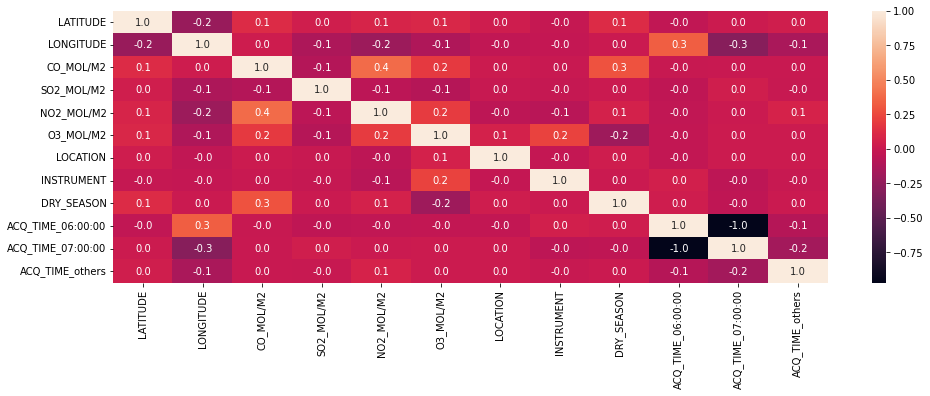

In [ ]:
plt.figure(figsize = (16,5))
dataplot = sb.heatmap(df.drop('FIRE_OCCURRED', axis=1).corr(), annot=True, fmt=".1f")
plt.show()

ACQ_TIME_06:00:00 highly autocorrelated with ACQ_TIME_07:00:00 due to the distribution of original ACQ_TIME. Drop ACQ_TIME_06:00:00

In [ ]:
df = df.drop(['ACQ_TIME_06:00:00'], axis=1)

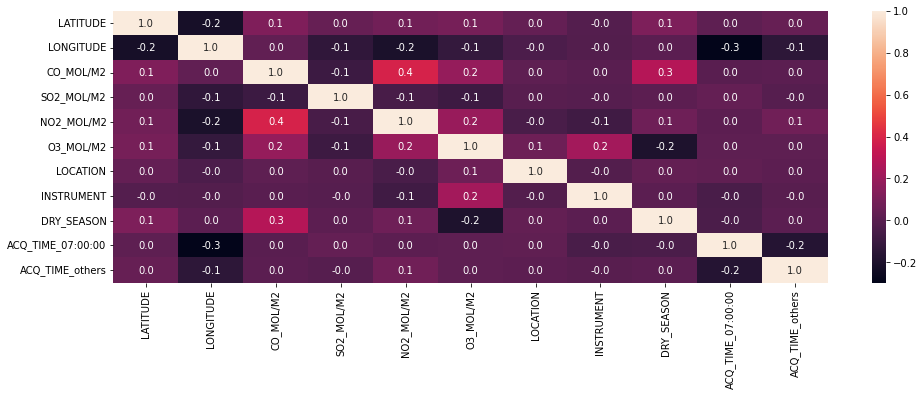

In [ ]:
plt.figure(figsize = (16,5))
dataplot = sb.heatmap(df.drop('FIRE_OCCURRED', axis=1).corr(), annot=True, fmt=".1f")
plt.show()

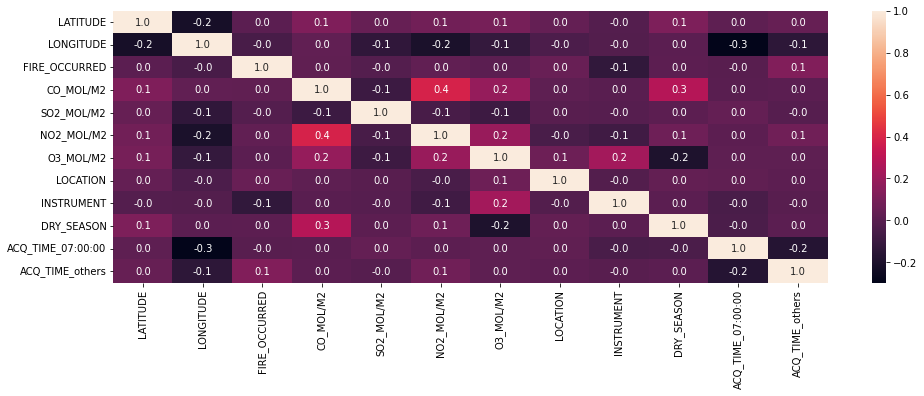

In [ ]:
plt.figure(figsize = (16,5))
dataplot = sb.heatmap(df.corr(), annot=True, fmt=".1f")
plt.show()

In [ ]:
df.drop('FIRE_OCCURRED', axis=1).describe().round(1)

,LATITUDE,LONGITUDE,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON,ACQ_TIME_07:00:00,ACQ_TIME_others
count,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0
mean,16.6,100.8,0.1,0.0,0.0,0.1,360.2,0.8,1.0,0.7,0.0
std,1.8,1.9,0.0,0.0,0.0,0.0,196.9,0.4,0.2,0.5,0.1
min,5.7,97.6,0.0,-0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
25%,15.5,99.3,0.0,-0.0,0.0,0.1,211.0,1.0,1.0,0.0,0.0
50%,16.8,100.5,0.0,0.0,0.0,0.1,343.0,1.0,1.0,1.0,0.0
75%,17.8,102.1,0.1,0.0,0.0,0.1,538.0,1.0,1.0,1.0,0.0
max,20.4,105.6,0.1,0.0,0.0,0.1,688.0,1.0,1.0,1.0,1.0


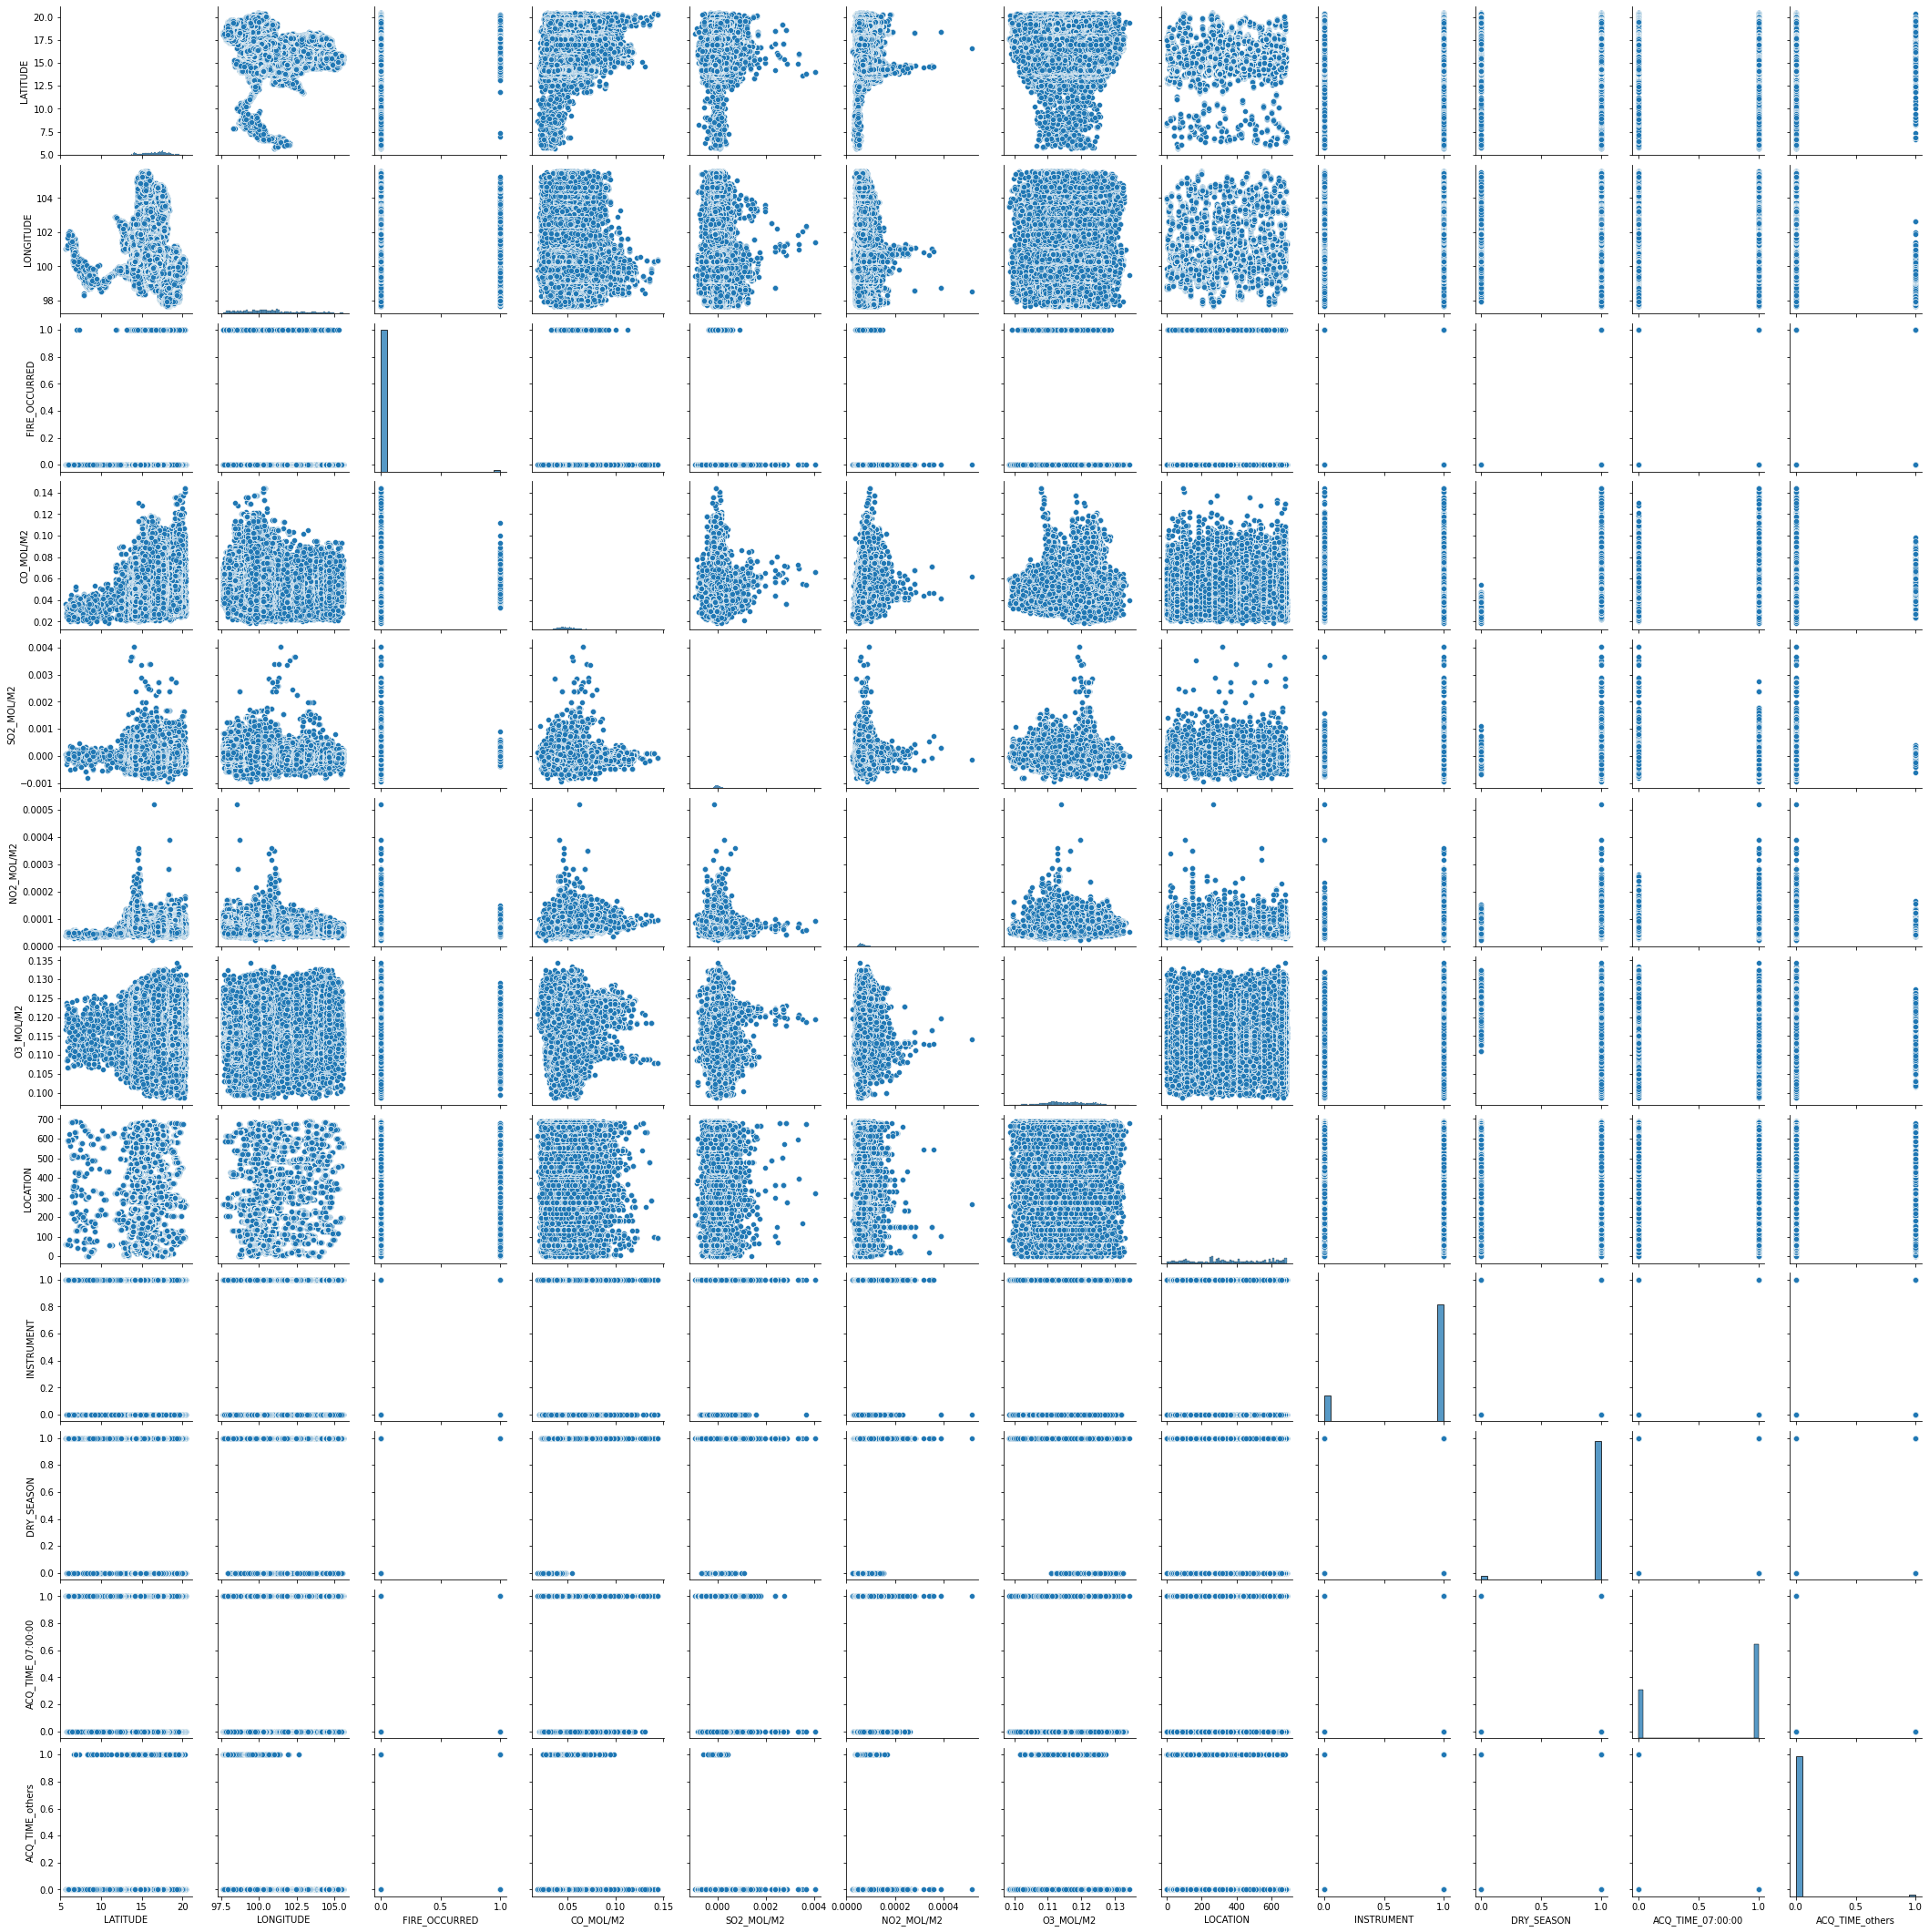

In [ ]:
sb.pairplot(df)

## Scaler

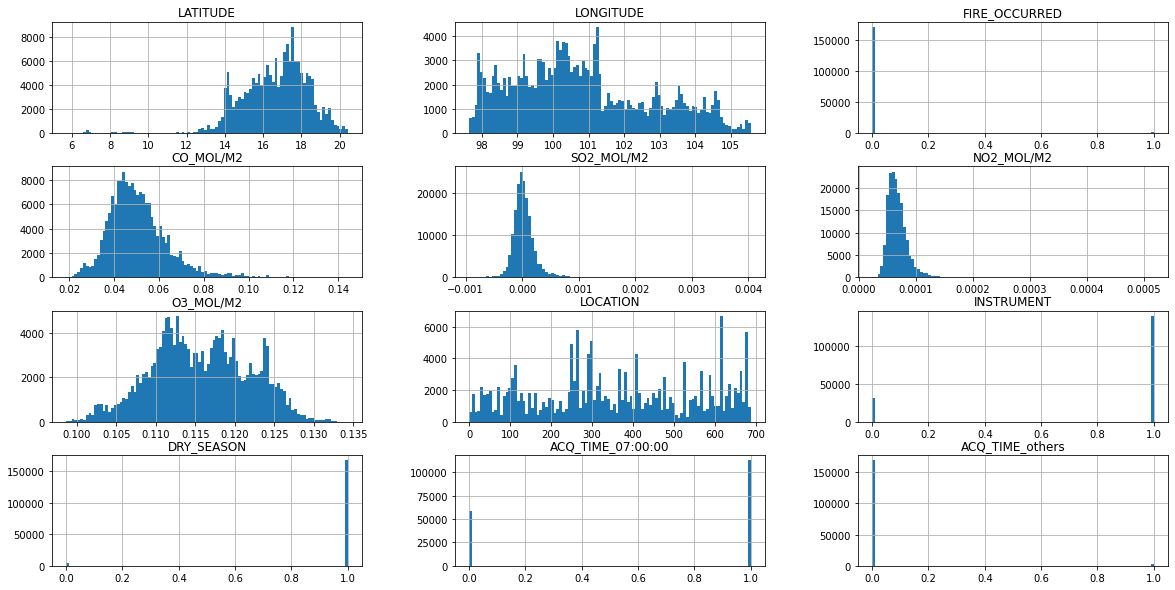

In [ ]:
df.hist(bins=100, figsize = (20,10))
plt.show()

In [ ]:
df.head()

,LATITUDE,LONGITUDE,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON,ACQ_TIME_07:00:00,ACQ_TIME_others
0,6.8704,100.4631,0,0.050393,-0.000069,0.000048,0.112543,132,0,1,1.0,0.0
1,6.8704,100.4631,0,0.052195,-0.000069,0.000048,0.112543,132,0,1,1.0,0.0
2,6.8704,100.4631,0,0.050393,-0.000069,0.000044,0.112543,132,0,1,1.0,0.0
3,6.8704,100.4631,0,0.052195,-0.000069,0.000044,0.112543,132,0,1,1.0,0.0
4,6.9289,100.4219,0,0.038055,0.000106,0.000046,0.118280,132,0,1,1.0,0.0


In [ ]:
df.describe().round(1)

,LATITUDE,LONGITUDE,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON,ACQ_TIME_07:00:00,ACQ_TIME_others
count,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0
mean,16.6,100.8,0.0,0.1,0.0,0.0,0.1,360.2,0.8,1.0,0.7,0.0
std,1.8,1.9,0.1,0.0,0.0,0.0,0.0,196.9,0.4,0.2,0.5,0.1
min,5.7,97.6,0.0,0.0,-0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
25%,15.5,99.3,0.0,0.0,-0.0,0.0,0.1,211.0,1.0,1.0,0.0,0.0
50%,16.8,100.5,0.0,0.0,0.0,0.0,0.1,343.0,1.0,1.0,1.0,0.0
75%,17.8,102.1,0.0,0.1,0.0,0.0,0.1,538.0,1.0,1.0,1.0,0.0
max,20.4,105.6,1.0,0.1,0.0,0.0,0.1,688.0,1.0,1.0,1.0,1.0


In [ ]:
display(df['INSTRUMENT'].value_counts())
display(df['DRY_SEASON'].value_counts())

1    140536
0     31357
Name: INSTRUMENT, dtype: int64

1    167147
0      4746
Name: DRY_SEASON, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

column_names = df.drop(['FIRE_OCCURRED'], axis = 1).columns.tolist()
y = df['FIRE_OCCURRED']

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop(['FIRE_OCCURRED'], axis = 1)), columns = column_names)

df = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1) # MUST RESET INDEX
df.head()

,LATITUDE,LONGITUDE,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON,ACQ_TIME_07:00:00,ACQ_TIME_others,FIRE_OCCURRED
0,0.079561,0.356387,0.252793,0.175102,0.048868,0.390066,0.19186,0.0,1.0,1.0,0.0,0
1,0.079561,0.356387,0.267145,0.175102,0.048868,0.390066,0.19186,0.0,1.0,1.0,0.0,0
2,0.079561,0.356387,0.252793,0.175102,0.041340,0.390066,0.19186,0.0,1.0,1.0,0.0,0
3,0.079561,0.356387,0.267145,0.175102,0.041340,0.390066,0.19186,0.0,1.0,1.0,0.0,0
4,0.083532,0.351189,0.154547,0.210118,0.045284,0.550787,0.19186,0.0,1.0,1.0,0.0,0


In [ ]:
df.describe().round(1)

,LATITUDE,LONGITUDE,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON,ACQ_TIME_07:00:00,ACQ_TIME_others,FIRE_OCCURRED
count,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0,171893.0
mean,0.7,0.4,0.3,0.2,0.1,0.5,0.5,0.8,1.0,0.7,0.0,0.0
std,0.1,0.2,0.1,0.0,0.0,0.2,0.3,0.4,0.2,0.5,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.7,0.2,0.2,0.2,0.1,0.4,0.3,1.0,1.0,0.0,0.0,0.0
50%,0.8,0.4,0.2,0.2,0.1,0.5,0.5,1.0,1.0,1.0,0.0,0.0
75%,0.8,0.6,0.3,0.2,0.1,0.6,0.8,1.0,1.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.drop('FIRE_OCCURRED', axis = 1).columns

Index(['LATITUDE', 'LONGITUDE', 'CO_MOL/M2', 'SO2_MOL/M2', 'NO2_MOL/M2',
       'O3_MOL/M2', 'LOCATION', 'INSTRUMENT', 'DRY_SEASON',
       'ACQ_TIME_07:00:00', 'ACQ_TIME_others'],
      dtype='object')

In [ ]:
min_values = scaler.data_min_

pd.DataFrame(min_values,
             df.drop('FIRE_OCCURRED', axis = 1).columns,
             columns=['data_min']).sort_values(by='data_min',ascending=False)

,data_min
LONGITUDE,97.638070
LATITUDE,5.698350
O3_MOL/M2,0.098620
CO_MOL/M2,0.018648
NO2_MOL/M2,0.000024
LOCATION,0.000000
INSTRUMENT,0.000000
DRY_SEASON,0.000000
ACQ_TIME_07:00:00,0.000000
ACQ_TIME_others,0.000000


In [ ]:
max_values = scaler.data_max_

pd.DataFrame(max_values,
             df.drop('FIRE_OCCURRED', axis = 1).columns,
             columns=['data_max']).sort_values(by='data_max',ascending=False)

,data_max
LOCATION,688.000000
LONGITUDE,105.564940
LATITUDE,20.429850
INSTRUMENT,1.000000
DRY_SEASON,1.000000
ACQ_TIME_07:00:00,1.000000
ACQ_TIME_others,1.000000
CO_MOL/M2,0.144224
O3_MOL/M2,0.134314
SO2_MOL/M2,0.004043


X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

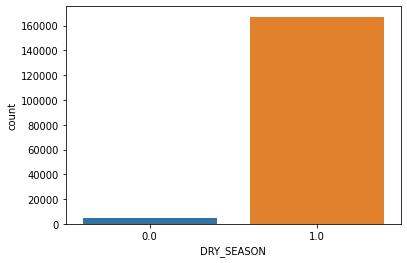

In [ ]:
sb.countplot(x=df["DRY_SEASON"])

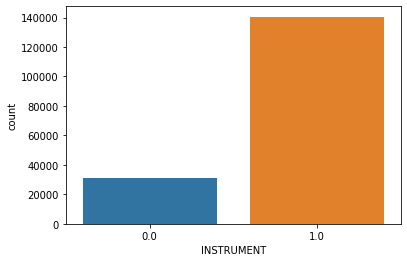

In [ ]:
sb.countplot(x=df["INSTRUMENT"])

## Saving Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171893 entries, 0 to 171892
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LATITUDE           171893 non-null  float64
 1   LONGITUDE          171893 non-null  float64
 2   CO_MOL/M2          171893 non-null  float64
 3   SO2_MOL/M2         171893 non-null  float64
 4   NO2_MOL/M2         171893 non-null  float64
 5   O3_MOL/M2          171893 non-null  float64
 6   LOCATION           171893 non-null  float64
 7   INSTRUMENT         171893 non-null  float64
 8   DRY_SEASON         171893 non-null  float64
 9   ACQ_TIME_07:00:00  171893 non-null  float64
 10  ACQ_TIME_others    171893 non-null  float64
 11  FIRE_OCCURRED      171893 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 15.7 MB


In [ ]:
df.to_csv('cleaned_gee_data_v2.csv')
!cp cleaned_gee_data_v2.csv "drive/My Drive/Senior Project/Datasets/"